# Ethereum-USD Data Retrieval and Historical Analysis

### With great deference to Dr. Michael Zargham for creating original version. 

### You will need to install pandas_datareader by running either: 
pip install pandas-datareader or conda install pandas-datareader

### Updates
1. Will import the dataset from the web without the need for downloading csv file.
2. Can use 'today' for latest information
3. Both USD and Bitcoin are used as exchange information for ethereum
4. Ability to add more exhange tickers
5. Horizons variable can be controlled by user to evaluate longer timeframes over all exchange tickers.
6. Multi-level index *df* brings broth exchanges together. Can and should be fully integrated into visualizations if more exchanges are introduced.
7. Data viz key: Blue for ETH to USD and Red for ETH to BTC, where applicable

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import datetime as dt

%matplotlib inline

sns.set_style('whitegrid')

Datetime: (year, month, day) format  

In [314]:
#First day of ethereum trading
start = dt.datetime(2015, 8, 6)

# Enter a specific date or today
# end = datetime.datetime(2017, 12, 29)
end = dt.date.today()


### If you get an error URL does not exist running the next line of code, re-run and it just might work
Choosing to import from Yahoo, you can enter other sources like Googel or Quandl

Specify (ticker symbol, data cource, start date, end date)

In [316]:
# Select exchange ticker symbol
eth_usd  = web.DataReader("ETH-USD", 'yahoo', start, end)
eth_btc  = web.DataReader("ETH-BTC", 'yahoo', start, end)

In [318]:
# Check latest results
eth_btc.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-19,0.04153,0.04698,0.04096,0.04624,0.04624,65125
2017-12-20,0.04624,0.04897,0.04487,0.04837,0.04837,64539
2017-12-21,0.04837,0.05154,0.04776,0.05054,0.05054,61802
2017-12-22,0.05054,0.05136,0.04550,0.04778,0.04778,80230
2017-12-23,0.04778,0.04898,0.04769,0.04813,0.04813,42893
2017-12-24,0.04815,0.04911,0.04769,0.04872,0.04872,41294
2017-12-25,0.04872,0.05356,0.04871,0.05215,0.05215,48165
2017-12-26,0.05215,0.05332,0.04640,0.04782,0.04782,46999
2017-12-27,0.04782,0.04890,0.04637,0.04790,0.04790,36759


In [319]:
# Check latest results
eth_usd.tail(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-19,786.169983,868.890015,767.590027,812.500000,812.500000,1094688835
2017-12-20,812.500000,830.200012,713.750000,799.169983,799.169983,889990388
2017-12-21,799.169983,840.549988,759.650024,789.390015,789.390015,725479885
2017-12-22,789.390015,794.159973,490.279999,657.830017,657.830017,1535685091
2017-12-23,657.809998,747.530029,651.099976,700.440002,700.440002,468771914
2017-12-24,700.440002,701.070007,597.119995,675.909973,675.909973,477777689
2017-12-25,676.080017,747.359985,671.710022,723.140015,723.140015,382873119
2017-12-26,723.140015,756.030029,722.229980,753.400024,753.400024,293691001
2017-12-27,753.440002,766.530029,706.669983,739.940002,739.940002,352542483


In [320]:
tickers = ['eth_usd', 'eth_btc']
tickers

['eth_usd', 'eth_btc']

Create *df* a multi-level indexed dataframe that with a framework to easily extend with more cryptocurrency exchanges to be added. *df* should be accessible for future analytics as well.

In [321]:
# Join exchange data into 1 dataframe
df = pd.concat([eth_usd, eth_btc], axis = 1, join='outer', keys=tickers)
df.columns.names = ['Ticker','Stock Info']
df.head()

Ticker     eth_usd                                       eth_btc            \
Stock Info    Open High     Low Close Adj Close Volume      Open      High   
Date                                                                         
2015-08-06  0.6747  3.0  0.6747  3.00      3.00    371  0.002810  0.100000   
2015-08-07  3.0000  3.0  0.1500  1.20      1.20   1438  0.009980  0.009980   
2015-08-08  1.2000  1.2  1.2000  1.20      1.20      0  0.003123  0.003631   
2015-08-09  1.2000  1.2  1.2000  1.20      1.20      0  0.002815  0.002897   
2015-08-10  1.2000  1.2  0.6504  0.99      0.99   7419  0.002600  0.004331   

Ticker                                           
Stock Info       Low     Close Adj Close Volume  
Date                                             
2015-08-06  0.002810  0.009980  0.009980    577  
2015-08-07  0.002304  0.003123  0.003123   2958  
2015-08-08  0.002290  0.002815  0.002815   2012  
2015-08-09  0.002275  0.002600  0.002600   1486  
2015-08-10  0.002434  0.003938  0.003938   4812

In [322]:
# Quick Stats info
df.describe()

Ticker         eth_usd                                                  \
Stock Info        Open        High         Low       Close   Adj Close   
count       880.000000  880.000000  880.000000  880.000000  880.000000   
mean         97.024869  101.996503   91.889522   97.990335   97.990335   
std         160.205872  168.876670  151.623012  162.169499  162.169499   
min           0.420000    0.471900    0.150000    0.420000    0.420000   
25%           7.562500    7.852500    7.137500    7.585000    7.585000   
50%          11.715000   12.075000   11.305000   11.725000   11.725000   
75%         169.200005  192.112496  154.452499  170.340000  170.340000   
max         812.500000  882.609985  767.590027  849.090027  849.090027   

Ticker                       eth_btc                                      \
Stock Info        Volume        Open        High         Low       Close   
count       8.800000e+02  880.000000  880.000000  880.000000  880.000000   
mean        6.730085e+07    0.030771    0.032382    0.029261    0.030833   
std         1.486877e+08    0.029540    0.030877    0.028068    0.029538   
min         0.000000e+00    0.001615    0.001839    0.001432    0.001615   
25%         3.420032e+05    0.010648    0.011095    0.009876    0.010677   
50%         1.647239e+06    0.019590    0.020255    0.018965    0.019595   
75%         7.254764e+07    0.046250    0.048972    0.043777    0.046288   
max         1.535685e+09    0.150500    0.152300    0.139100    0.150500   

Ticker                                 
Stock Info   Adj Close         Volume  
count       880.000000     880.000000  
mean          0.030833   29228.361364  
std           0.029538   33697.371524  
min           0.001615     147.000000  
25%           0.010677    5610.000000  
50%           0.019595   18052.000000  
75%           0.046288   41040.000000  
max           0.150500  275512.000000

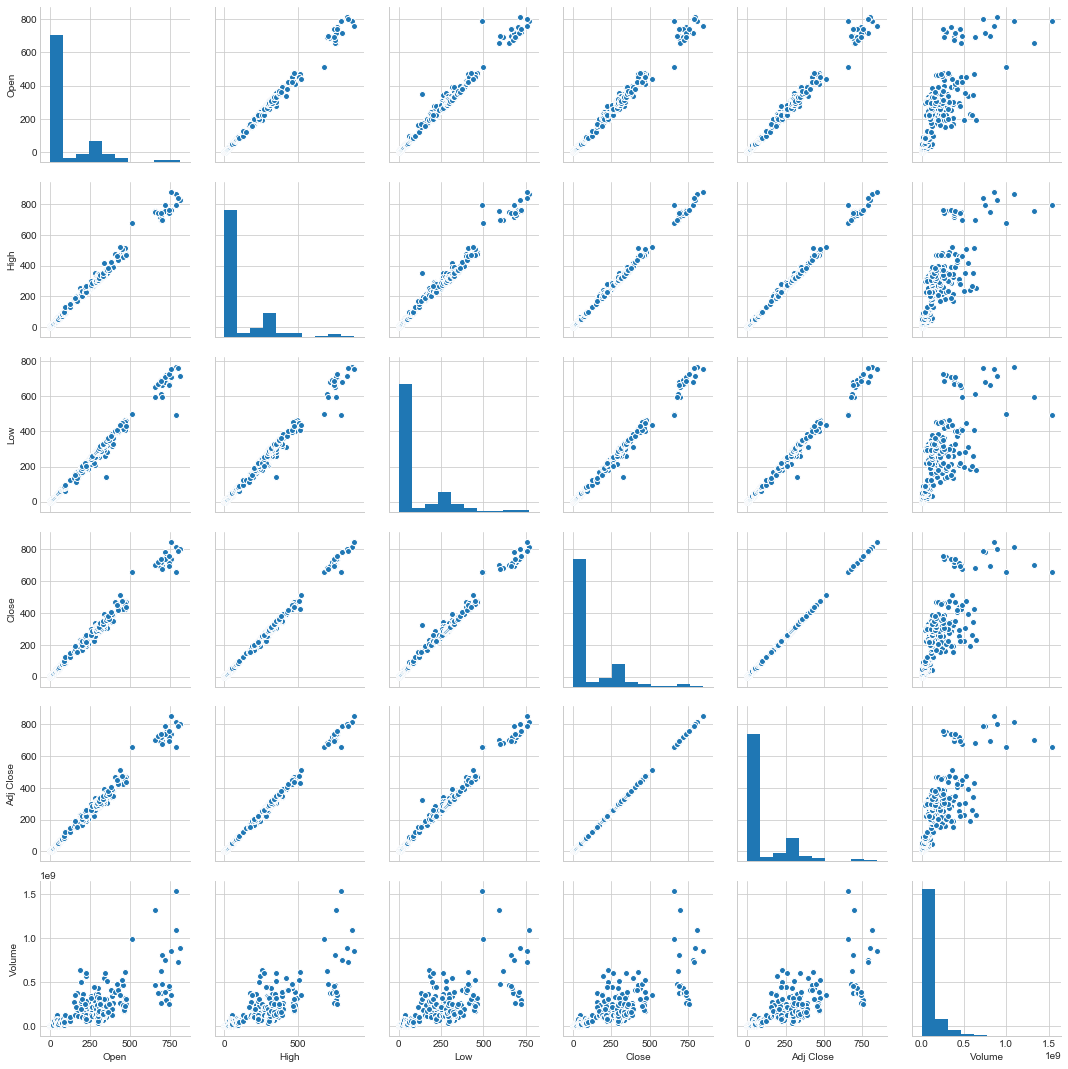

In [323]:
p = sns.pairplot(data=df['eth_usd'])

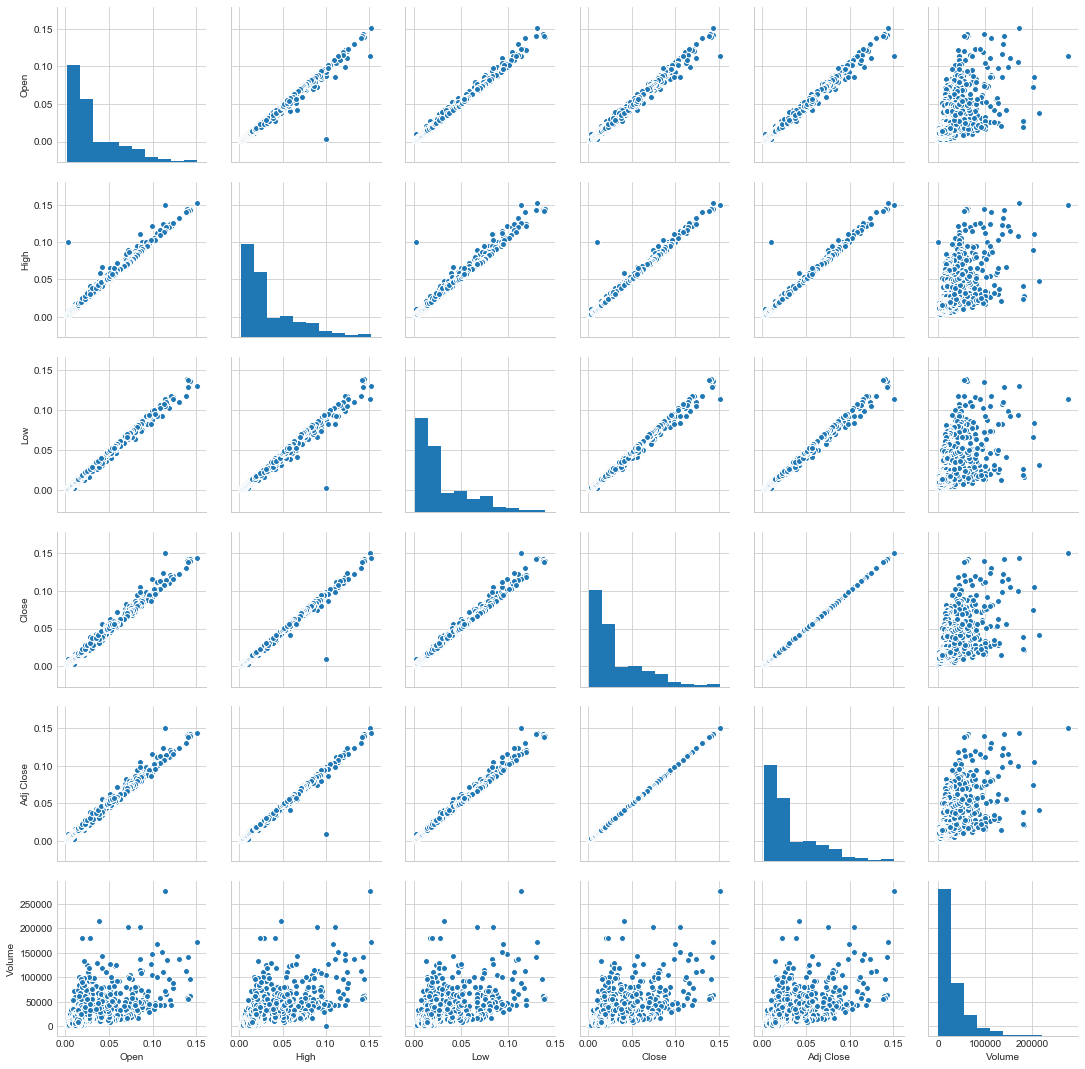

In [324]:
q = sns.pairplot(data=df['eth_btc'])

In [325]:
returns = pd.DataFrame()

In [326]:
for tick in tickers:
    returns[tick+' Return'] = df[tick]['Close'].pct_change()
returns.head()

,eth_usd Return,eth_btc Return
Date,,
2015-08-06,NaN,NaN
2015-08-07,-0.600,-0.687074
2015-08-08,0.000,-0.098623
2015-08-09,0.000,-0.076377
2015-08-10,-0.175,0.514615


In [387]:
returns.corr()

,eth_usd Return,eth_btc Return
eth_usd Return,1.000000,0.776154
eth_btc Return,0.776154,1.000000


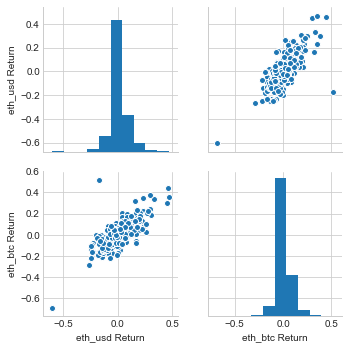

In [327]:
sns.pairplot(returns[1:])

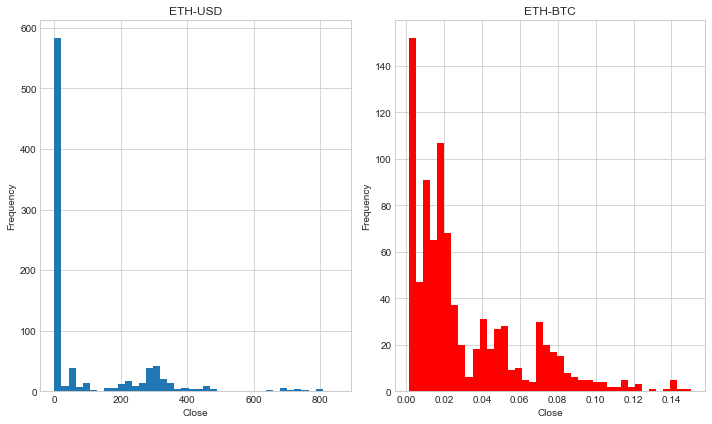

In [328]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

for ax in axes:
    ax.set_xlabel('Close')
    ax.set_ylabel('Frequency')

axes[0].hist(df.eth_usd['Close'], bins = 40)
axes[0].set_title('ETH-USD')

axes[1].hist(df.eth_btc['Close'], bins = 40, color = 'r')
axes[1].set_title('ETH-BTC')

fig
plt.tight_layout()

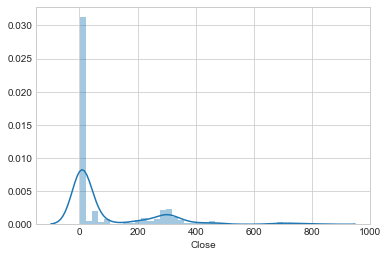

In [329]:
sns.distplot(df['eth_usd']['Close'], bins =40)


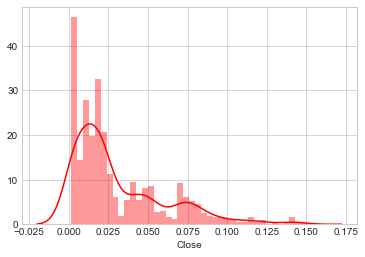

In [330]:
sns.distplot(df['eth_btc']['Close'], bins = 40, color = 'red')

Our interest is in the sliding time window price moves.

In [331]:
# If we want this performed on the multilevel dataframe, uncomment this cell. 
# Else, next cell performs on the eth_usd and eth_btc exchanges individually.

# horizons = 10
# df2 = pd.DataFrame()

# for tick in tickers:
#     for p in range(1,horizons+1):
#         df2[tick + str(p) + ' Deltas'] = df[tick]['Close']/df[tick]['Close'].shift(periods=p) - 1

# df2.tail(11)

**Horizons Variable controls the number of holding days of all currency exchanges. Change horizons for larger day analyses.** 

In [374]:
horizons = 10

for p in range(1,horizons+1):
    eth_usd[str(p) + ' Deltas'] = eth_usd['Close']/eth_usd['Close'].shift(periods=p) - 1
    eth_btc[str(p) + ' Deltas'] = eth_btc['Close']/eth_btc['Close'].shift(periods=p) - 1
eth_usd.tail(11)

,Open,High,Low,Close,Adj Close,Volume,1 Deltas,2 Deltas,3 Deltas,4 Deltas,...,21 Deltas,22 Deltas,23 Deltas,24 Deltas,25 Deltas,26 Deltas,27 Deltas,28 Deltas,29 Deltas,30 Deltas
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-23,657.809998,747.530029,651.099976,700.440002,700.440002,468771914,0.064774,-0.112682,-0.123541,-0.137920,...,0.529479,0.517483,0.610762,0.638763,0.502220,0.473866,0.488588,0.507587,0.488936,0.722803
2017-12-24,700.440002,701.070007,597.119995,675.909973,675.909973,477777689,-0.035021,0.027484,-0.143757,-0.154235,...,0.460448,0.475915,0.464340,0.554352,0.581372,0.449611,0.422250,0.436456,0.454790,0.436792
2017-12-25,676.080017,747.359985,671.710022,723.140015,723.140015,382873119,0.069876,0.032408,0.099281,-0.083926,...,0.548712,0.562499,0.579046,0.566662,0.662964,0.691872,0.550904,0.521631,0.536830,0.556445
2017-12-26,723.140015,756.030029,722.229980,753.400024,753.400024,293691001,0.041845,0.114646,0.075610,0.145281,...,0.659618,0.613518,0.627882,0.645122,0.632220,0.732551,0.762669,0.615802,0.585304,0.601139
2017-12-27,753.440002,766.530029,706.669983,739.940002,739.940002,352542483,-0.017866,0.023232,0.094732,0.056393,...,0.751420,0.629967,0.584692,0.598799,0.615731,0.603059,0.701598,0.731178,0.586935,0.556982
2017-12-28,739.929993,741.460022,671.229980,716.690002,716.690002,437323299,-0.031421,-0.048726,-0.008919,0.060334,...,0.701745,0.696388,0.578751,0.534898,0.548562,0.564962,0.552689,0.648132,0.676782,0.537071
2017-12-29,716.690002,755.200012,710.200012,739.599976,739.599976,392497843,0.031966,-0.000460,-0.018317,0.022762,...,0.637225,0.756144,0.750615,0.629218,0.583963,0.598064,0.614988,0.602322,0.700816,0.730382
2017-12-30,739.599976,741.669983,663.880005,692.989990,692.989990,455555629,-0.063021,-0.033069,-0.063451,-0.080183,...,0.465529,0.534046,0.645471,0.640291,0.526544,0.484141,0.497353,0.513211,0.501343,0.593630
2017-12-31,692.989990,746.619995,686.440002,741.130005,741.130005,259822610,0.069467,0.002069,0.034101,0.001608,...,0.697931,0.567335,0.640612,0.759777,0.754237,0.632589,0.587240,0.601370,0.618329,0.605637


In [375]:
eth_btc.tail(11)

,Open,High,Low,Close,Adj Close,Volume,1 Deltas,2 Deltas,3 Deltas,4 Deltas,...,21 Deltas,22 Deltas,23 Deltas,24 Deltas,25 Deltas,26 Deltas,27 Deltas,28 Deltas,29 Deltas,30 Deltas
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-23,0.04778,0.04898,0.04769,0.04813,0.04813,42893,0.007325,-0.047685,-0.004962,0.040874,...,0.148687,0.134072,0.100869,0.109242,0.024260,-0.012920,-0.047497,-0.089482,-0.163102,-0.053118
2017-12-24,0.04815,0.04911,0.04769,0.04872,0.04872,41294,0.012258,0.019674,-0.036011,0.007236,...,0.182811,0.162768,0.147974,0.114364,0.122839,0.036816,-0.000820,-0.035820,-0.078320,-0.152843
2017-12-25,0.04872,0.05356,0.04871,0.05215,0.05215,48165,0.070402,0.083524,0.091461,0.031856,...,0.296941,0.266084,0.244630,0.228794,0.192818,0.201890,0.109811,0.069524,0.032060,-0.013432
2017-12-26,0.05215,0.05332,0.04640,0.04782,0.04782,46999,-0.083030,-0.018473,-0.006441,0.000837,...,0.229938,0.189256,0.160961,0.141289,0.126767,0.093779,0.102097,0.017663,-0.019278,-0.053632
2017-12-27,0.04782,0.04890,0.04637,0.04790,0.04790,36759,0.001673,-0.081496,-0.016831,-0.004779,...,0.569977,0.231996,0.191246,0.162904,0.143198,0.128652,0.095608,0.103941,0.019366,-0.017637
2017-12-28,0.04790,0.05075,0.04774,0.04989,0.04989,40883,0.041545,0.043287,-0.043337,0.024015,...,1.010073,0.635202,0.283179,0.240736,0.211216,0.190692,0.175542,0.141125,0.149804,0.061715
2017-12-29,0.04989,0.05175,0.04939,0.05108,0.05108,43487,0.023852,0.066388,0.068172,-0.020518,...,0.836749,1.058018,0.674205,0.313786,0.270331,0.240107,0.219093,0.203582,0.168344,0.177230
2017-12-30,0.05108,0.05528,0.05057,0.05512,0.05512,66161,0.079092,0.104831,0.150731,0.152656,...,0.754297,0.982021,1.220790,0.806621,0.417695,0.370803,0.338189,0.315513,0.298775,0.260750
2017-12-31,0.05513,0.05540,0.05244,0.05352,0.05352,48718,-0.029028,0.047768,0.072760,0.117328,...,0.857044,0.703374,0.924488,1.156326,0.754179,0.376543,0.331012,0.299345,0.277327,0.261074


Create a dataframe *deltas* with just the calculated precent change columns columns

In [376]:
deltas_eth_usd = eth_usd[eth_usd.columns[-horizons:]].dropna()
deltas_eth_usd.head()

,21 Deltas,22 Deltas,23 Deltas,24 Deltas,25 Deltas,26 Deltas,27 Deltas,28 Deltas,29 Deltas,30 Deltas
Date,,,,,,,,,,
2015-09-05,-0.021898,-0.251397,-0.251397,-0.287234,0.038760,0.353535,0.116667,0.116667,0.116667,-0.553333
2015-09-06,-0.015385,-0.065693,-0.284916,-0.284916,-0.319149,-0.007752,0.292929,0.066667,0.066667,0.066667
2015-09-07,-0.073529,-0.030769,-0.080292,-0.296089,-0.296089,-0.329787,-0.023256,0.272727,0.050000,0.050000
2015-09-08,-0.024194,-0.110294,-0.069231,-0.116788,-0.324022,-0.324022,-0.356383,-0.062016,0.222222,0.008333
2015-09-09,-0.217105,-0.040323,-0.125000,-0.084615,-0.131387,-0.335196,-0.335196,-0.367021,-0.077519,0.202020


In [377]:
deltas_eth_btc = eth_btc[eth_btc.columns[-horizons:]].dropna()
deltas_eth_btc.head()

,21 Deltas,22 Deltas,23 Deltas,24 Deltas,25 Deltas,26 Deltas,27 Deltas,28 Deltas,29 Deltas,30 Deltas
Date,,,,,,,,,,
2015-09-05,-0.029343,-0.146610,-0.201501,-0.197366,0.159684,0.377603,1.086538,0.927176,0.737112,-0.456413
2015-09-06,0.115989,-0.072106,-0.184206,-0.236679,-0.232727,0.108593,0.316912,0.994615,0.842274,0.660583
2015-09-07,-0.018447,0.087799,-0.095545,-0.204814,-0.255961,-0.252108,0.080590,0.283647,0.944231,0.795737
2015-09-08,-0.090193,-0.012816,0.094039,-0.090356,-0.200252,-0.251693,-0.247818,0.086789,0.291011,0.955385
2015-09-09,-0.226992,-0.126700,-0.052427,0.050140,-0.126856,-0.232342,-0.281719,-0.278000,0.043181,0.239208


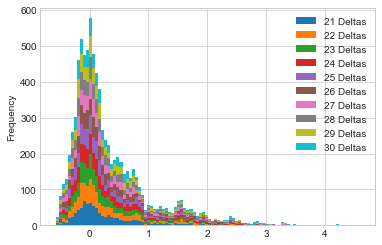

In [378]:
deltas_eth_usd.plot.hist(bins = 100, stacked=True)

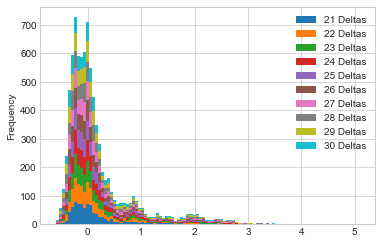

In [379]:
deltas_eth_btc.plot.hist(bins = 100, stacked=True)

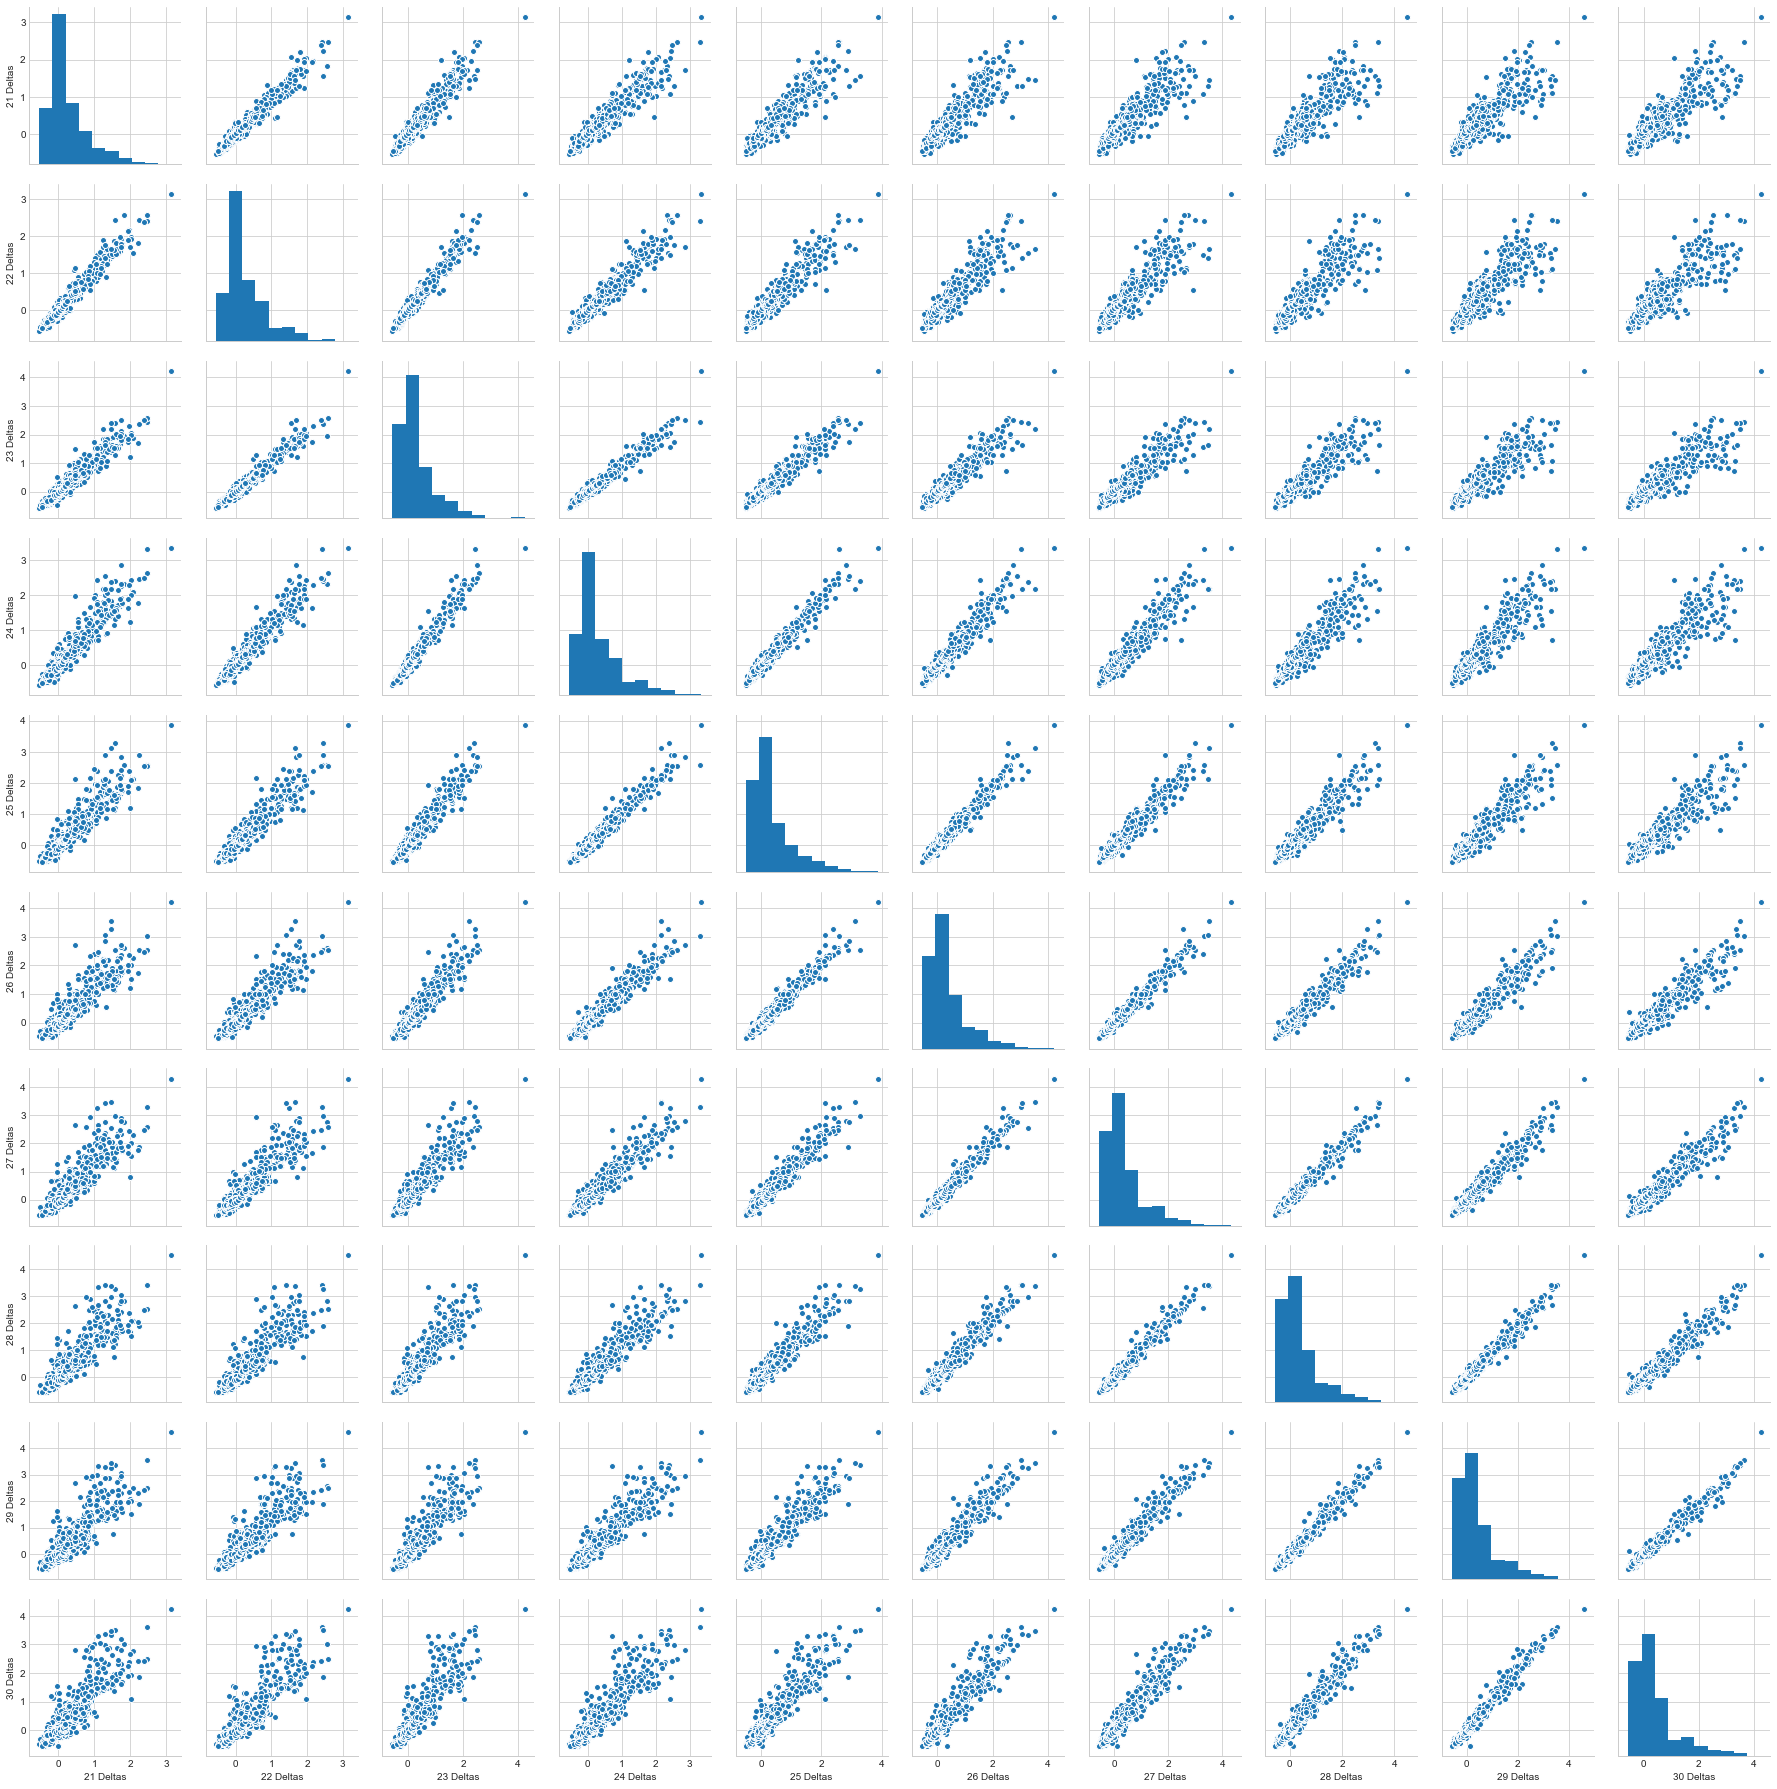

In [380]:
if horizons <= 10:
    sns.pairplot(deltas_eth_usd)
else:
    print('Too many graphs and too much computing power for pairplot. Try fewer horizons')

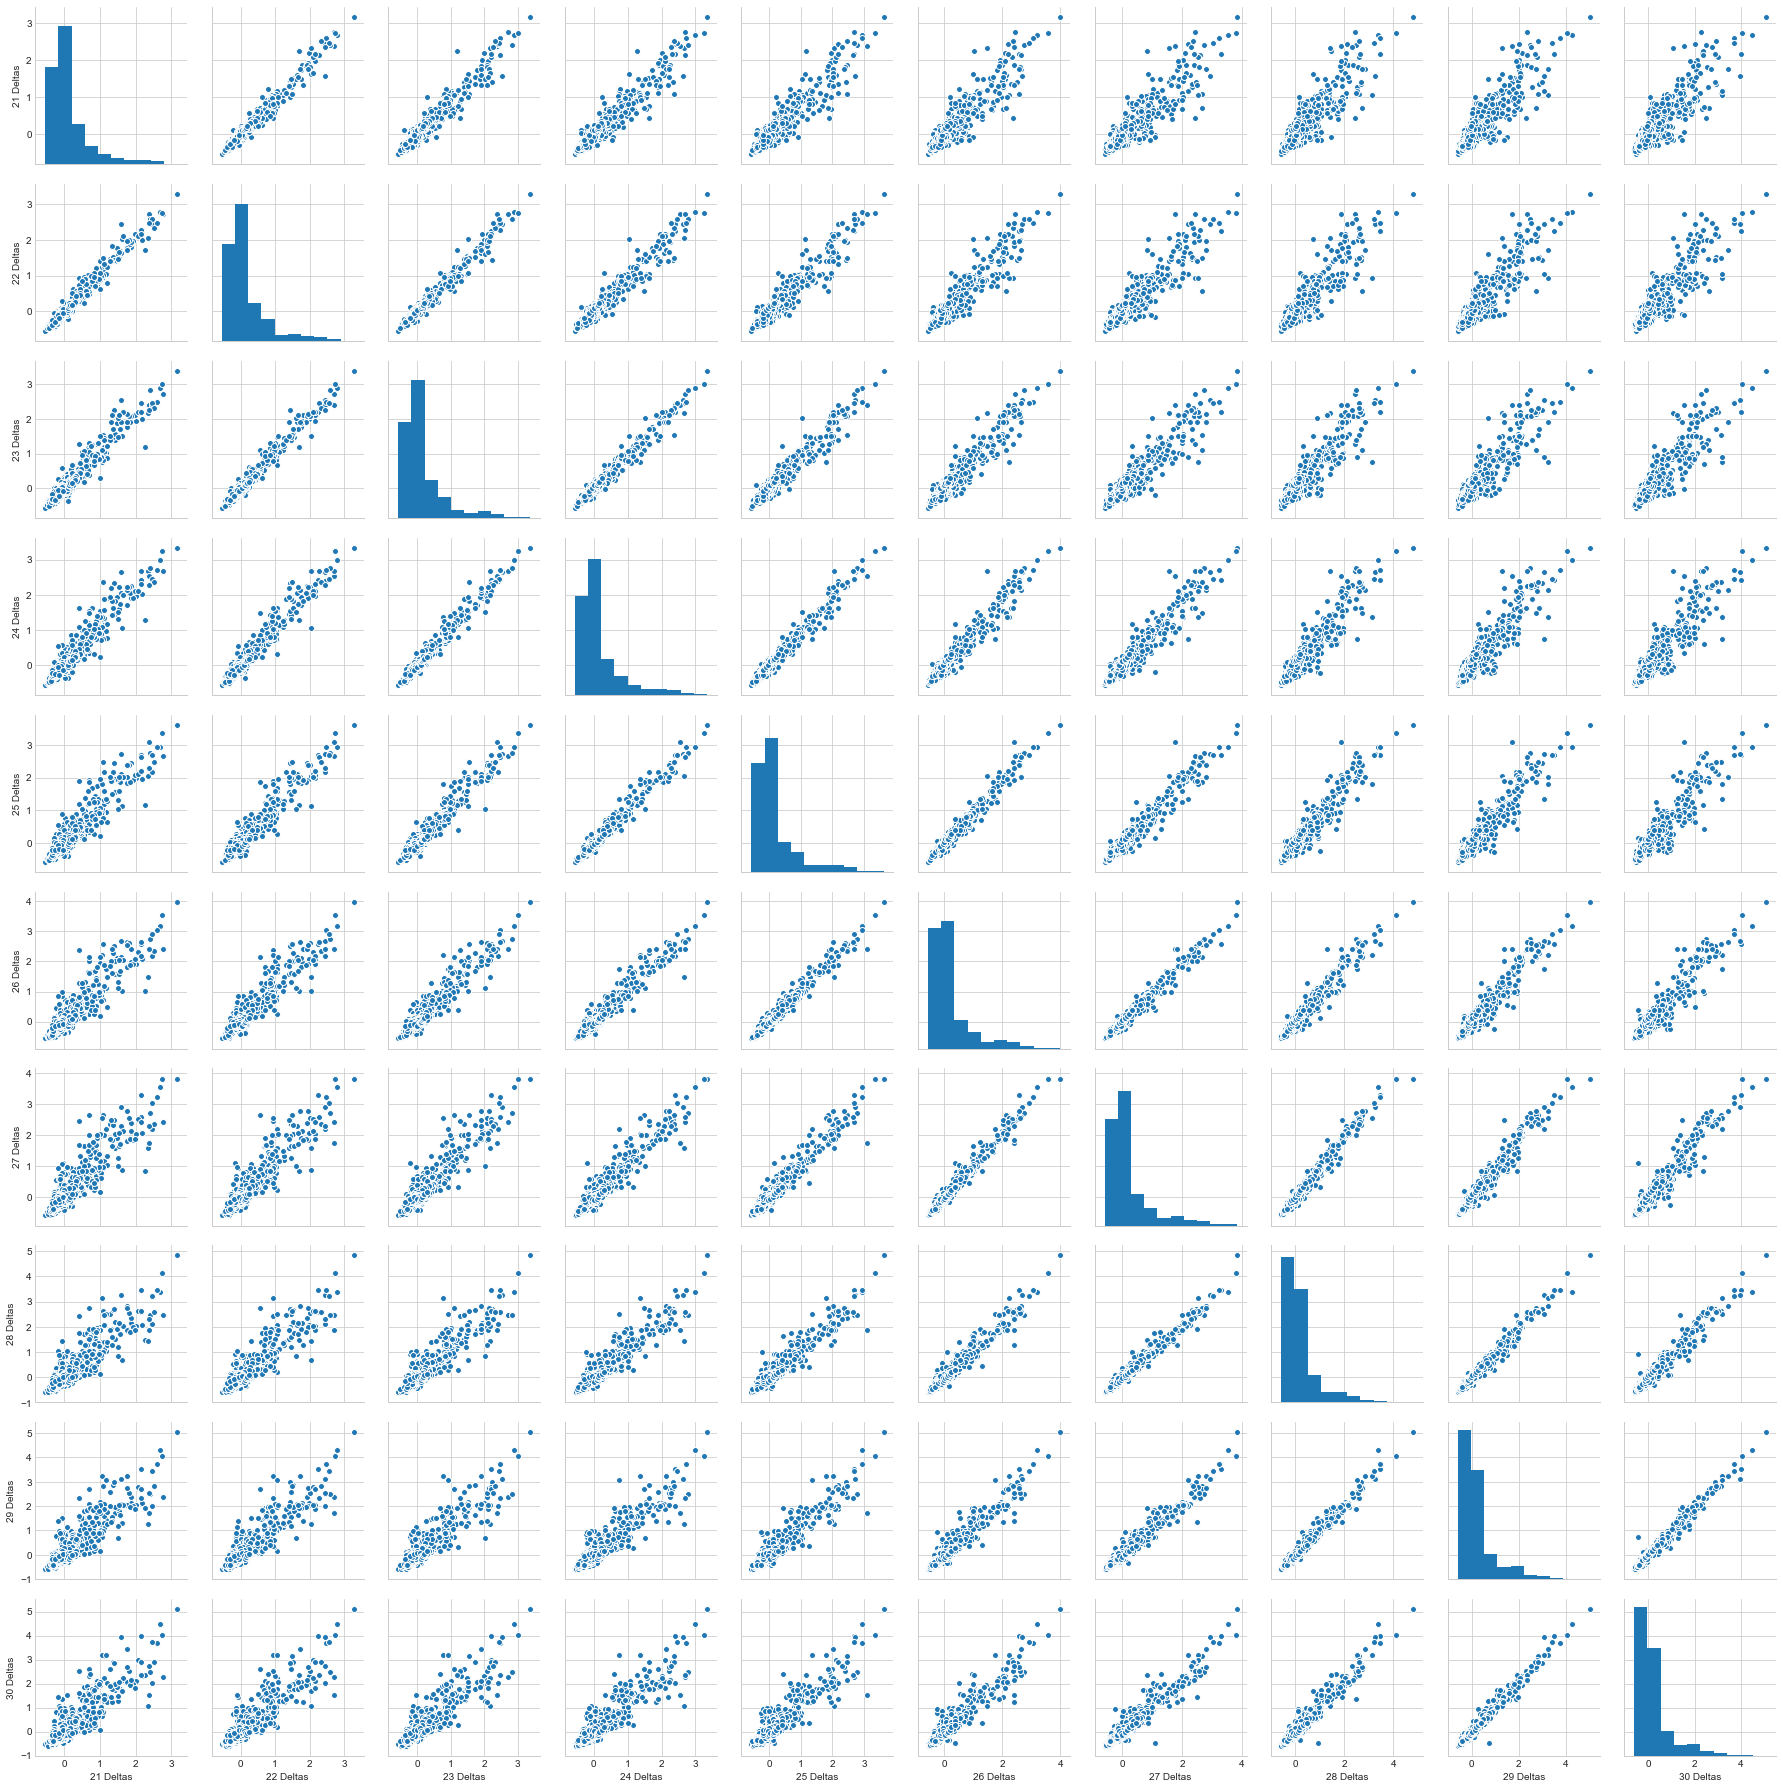

In [381]:
if horizons <= 10:
    sns.pairplot(deltas_eth_btc)
else:
    print('Too many graphs and too much computing power for pairplot. Try fewer horizons')

In [382]:
# Turn column names back into integers to be used 
deltaints =  np.arange(1,horizons+1,1)
deltas_eth_usd.columns= deltaints

stats_eth_usd = pd.melt(deltas_eth_usd)
stats_eth_usd.columns = ["horizon", "percent_change"]

deltas_eth_btc.columns= deltaints

stats_eth_btc = pd.melt(deltas_eth_btc)
stats_eth_btc.columns = ["horizon", "percent_change"]

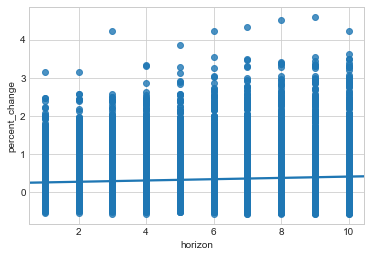

In [383]:
sns.regplot("horizon","percent_change", stats_eth_usd)

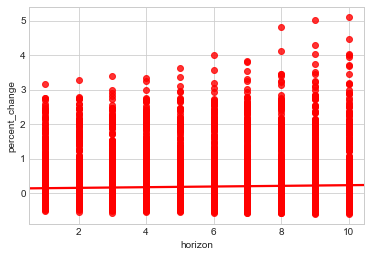

In [384]:
sns.regplot("horizon","percent_change", stats_eth_btc, color = 'red')

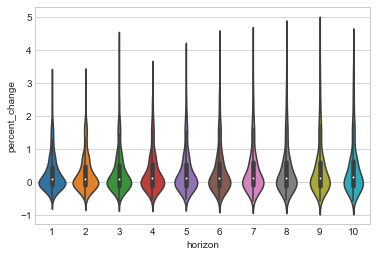

In [385]:
sns.violinplot(x="horizon",y="percent_change", data=stats_eth_usd)

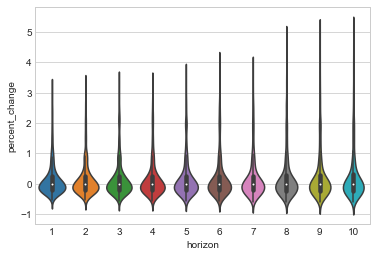

In [386]:
sns.violinplot(x="horizon",y="percent_change", data=stats_eth_btc)

Horizons of 10 and 30 were run. Ethereums change versus bitcoin is actually smaller than its change versus the dollar. There is a mirroring effect where the large swings in bitcoin are matched often matched similar price changes in Ethereum. The positive ends of the KDE are much longer than the negative ends, exhibiting Ethereum's growth relative to both the dollar and bitcoin. 